# Introduction

This notebook illustrates basic data loading and visualization techniques.

These are nearly identicial to the functions I used to generate the figures in my previous lecture, but the display code for the plotting has been greatly simplifed (to save on space and complexity).

## Notebook

The file you are reading is a "Google Colaboratory" notebook -- it is essentially a website that allows you to execute code on the cloud. We will be doing our coding in Python, which is the *lingua franca* of machine learning.

## Understanding Python Code

I don't expect that you will be familiar with the code below; the notebook format will try to explain everything that's going on. In addition, there are comments within the code itself that explain what's happening. Comments are green lines that start with a pound sign (`#`).

You can also feel free to view and mess with this notebook -- your changes should not be saved, but you can play around with various settings.

# Imports and Project Setup

We set up our project and import important packages here.

Python requires the use of "modules", which are basically packages of code that enable us to use more advanced functionality than the core library. We don't want to have to write all the functions to load data, create plots, and train models by hand, so we load these modules at the start so we have access to pre-built sets of code that will do all this boring stuff for us. 

## Imports

Most of the packages we import are very common and popular for machine learning. Because they are so important, I will provide some links with more info for them, so you can explore their functionality on your own. 

- `pandas`: This module defines a table-like format for data called "dataframes"; these are similar to MATLAB's `table`, R's `dataframe`, or Excel spreadsheets. Here we'll use them for loading and parsing the data.
- `numpy`: This is a very common module for doing numeric analysis. It provides support for matrices and tensors, as well as hundreds of mathematical operations and commonly-used linear algebra functions.
- `matplotlib`: This is the "matrix plotting library", which allows us to easily generate plots and charts of our data. Thanks to the format of the notebook, these plots will appear directly in our web browser!

The code cell below, when executed, will run the import statements.

In [1]:
import os
from pathlib import Path
import pandas as pd
import numpy as np

# We use two different plotting libraries, depending on which kind of plot we want
import matplotlib.pyplot as plt
import seaborn as sns

# Set an option for Pandas to display smaller floating-point numbers
pd.options.display.float_format = '{:,.2f}'.format

# Import libraries to work with strings
import sys
if sys.version_info[0] < 3: 
    from StringIO import StringIO
else:
    from io import StringIO

## Loading Data

We typically load data from `.csv` files, which are basically spreadsheets.

In Excel, you can export spreadsheets as `.csv` by going to "File" -> "Export" -> "Change File Type" and selecting **"CSV (Comma delimited) (*.csv)**" under "Other File Types".

In [2]:
# Load the dataset into a Pandas dataframe
data_dir = Path('data', 'breast_cytology_features')
bca_wisconsin_path = data_dir / 'wisconsin_breast_cancer_data.csv'

In [3]:
df = pd.read_csv(bca_wisconsin_path)

## Double-Check Our Data

It's a good idea to take a peek at what we've loaded, just to make sure that we don't have an empty or corrupted dataset.

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,"1,001.00",0.12,0.28,0.30,0.15,...,25.38,17.33,184.60,"2,019.00",0.16,0.67,0.71,0.27,0.46,0.12
1,842517,M,20.57,17.77,132.90,"1,326.00",0.08,0.08,0.09,0.07,...,24.99,23.41,158.80,"1,956.00",0.12,0.19,0.24,0.19,0.28,0.09
2,84300903,M,19.69,21.25,130.00,"1,203.00",0.11,0.16,0.20,0.13,...,23.57,25.53,152.50,"1,709.00",0.14,0.42,0.45,0.24,0.36,0.09
3,84348301,M,11.42,20.38,77.58,386.10,0.14,0.28,0.24,0.11,...,14.91,26.50,98.87,567.70,0.21,0.87,0.69,0.26,0.66,0.17
4,84358402,M,20.29,14.34,135.10,"1,297.00",0.10,0.13,0.20,0.10,...,22.54,16.67,152.20,"1,575.00",0.14,0.20,0.40,0.16,0.24,0.08


We can also use the `.info()` method to get a peek at each of the columns in our dataset and see what kind of values we have. We can compare the number of entries to the number of `non-null` values in each column to see whether we have any missing data, and we can check which values are integers, floating points (i.e. decimal places), etc.

In [5]:
# View some statistics on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## Handle Categorical Attributes

Generally, for machine learning, if you have a feature with categorical values (like "Hot" and "Cold"), you want to convert them to numeric values. There are two ways of doing this.

### Ordinal Encoding

If the categorical values are **ordinal**, meaning you can place them in some kind of order (e.g. "Low", "Intermediate", and "High"), you can convert these into ordered numeric values where Low = 0, Intermediate = 1, and High = 2. In Python you can use the `OrdinalEncoder` package to do this. 

In [6]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

### One-Hot Encoding

If the values are **not ordinal**, meaning the order of them doesn't matter (e.g. "Blood Type A", "Blood Type B") then you can use **one-hot encoding**: Replace the feature with $N$ new features, where $N$ is the number of categories. Each of the new features is *binary*, meaning it's only 0 or 1, 

In [7]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()

Luckily, we don't have this situation here in our feature set: All of our measured values are floating-point values. The only categorical entry in our data is our target categories. Targets (or classes) are often encoded numerically, so let's do that now.  

### Converting Target to Numeric

Our targets in this dataset are encoded as characters, "M" (standing for "Malignant") and "B" (standing for "Benign"). Practically speaking, it's easier to work with these labels if they are numeric.

We have what's called a **binary class problem**, meaning that there are only two categories of data that we need to worry about. For this type of problem, it's common to encode the categories as 0 and 1. 

In our case, we're going to set "Benign" to 0 and "Malignant" to 1 (there's no technical reason for this; to me, it makes sense because 1 is typically referred to as "positive", much like a "positive" diagnosis of malignancy).

In [8]:
diagnosis_cat = df['diagnosis']

In [9]:
diagnosis_cat

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [10]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [11]:
label_encoder.fit_transform(diagnosis_cat)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [12]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

diagnosis_cat = df['diagnosis']

# Fit the encoder to the categories, and immediately 
diagnosis_lab = label_encoder.fit_transform(diagnosis_cat)

# Add the diagnosis label back to the dataframe
df['diagnosis_label'] = diagnosis_lab

In [13]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_label
count,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,...,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00
mean,"30,371,831.43",14.13,19.29,91.97,654.89,0.10,0.10,0.09,0.05,0.18,...,25.68,107.26,880.58,0.13,0.25,0.27,0.11,0.29,0.08,0.37
std,"125,020,585.61",3.52,4.30,24.30,351.91,0.01,0.05,0.08,0.04,0.03,...,6.15,33.60,569.36,0.02,0.16,0.21,0.07,0.06,0.02,0.48
min,"8,670.00",6.98,9.71,43.79,143.50,0.05,0.02,0.00,0.00,0.11,...,12.02,50.41,185.20,0.07,0.03,0.00,0.00,0.16,0.06,0.00
25%,"869,218.00",11.70,16.17,75.17,420.30,0.09,0.06,0.03,0.02,0.16,...,21.08,84.11,515.30,0.12,0.15,0.11,0.06,0.25,0.07,0.00
50%,"906,024.00",13.37,18.84,86.24,551.10,0.10,0.09,0.06,0.03,0.18,...,25.41,97.66,686.50,0.13,0.21,0.23,0.10,0.28,0.08,0.00
75%,"8,813,129.00",15.78,21.80,104.10,782.70,0.11,0.13,0.13,0.07,0.20,...,29.72,125.40,"1,084.00",0.15,0.34,0.38,0.16,0.32,0.09,1.00
max,"911,320,502.00",28.11,39.28,188.50,"2,501.00",0.16,0.35,0.43,0.20,0.30,...,49.54,251.20,"4,254.00",0.22,1.06,1.25,0.29,0.66,0.21,1.00


In [14]:
# Ensure the labels were added correctly
df.head(20)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_label
0,842302,M,17.99,10.38,122.80,"1,001.00",0.12,0.28,0.30,0.15,...,17.33,184.60,"2,019.00",0.16,0.67,0.71,0.27,0.46,0.12,1
1,842517,M,20.57,17.77,132.90,"1,326.00",0.08,0.08,0.09,0.07,...,23.41,158.80,"1,956.00",0.12,0.19,0.24,0.19,0.28,0.09,1
2,84300903,M,19.69,21.25,130.00,"1,203.00",0.11,0.16,0.20,0.13,...,25.53,152.50,"1,709.00",0.14,0.42,0.45,0.24,0.36,0.09,1
3,84348301,M,11.42,20.38,77.58,386.10,0.14,0.28,0.24,0.11,...,26.50,98.87,567.70,0.21,0.87,0.69,0.26,0.66,0.17,1
4,84358402,M,20.29,14.34,135.10,"1,297.00",0.10,0.13,0.20,0.10,...,16.67,152.20,"1,575.00",0.14,0.20,0.40,0.16,0.24,0.08,1
5,843786,M,12.45,15.70,82.57,477.10,0.13,0.17,0.16,0.08,...,23.75,103.40,741.60,0.18,0.52,0.54,0.17,0.40,0.12,1
6,844359,M,18.25,19.98,119.60,"1,040.00",0.09,0.11,0.11,0.07,...,27.66,153.20,"1,606.00",0.14,0.26,0.38,0.19,0.31,0.08,1
7,84458202,M,13.71,20.83,90.20,577.90,0.12,0.16,0.09,0.06,...,28.14,110.60,897.00,0.17,0.37,0.27,0.16,0.32,0.12,1
8,844981,M,13.00,21.82,87.50,519.80,0.13,0.19,0.19,0.09,...,30.73,106.20,739.30,0.17,0.54,0.54,0.21,0.44,0.11,1
9,84501001,M,12.46,24.04,83.97,475.90,0.12,0.24,0.23,0.09,...,40.68,97.65,711.40,0.19,1.06,1.10,0.22,0.44,0.21,1


# Training and Testing Dataset Split

The order of data wrangling techniques is debatable, but number one is **separate out a testing set**.

Separating out a training and testing set is a fundamental step of good machine learning. During data exploration, it helps to prevent **data snooping bias**, which can influence your design decisions. During training, it helps prevent **overfitting** your model to your specific data, thus improving **generalization**. 

A good general rule is that around **60-70%** of your dataset should be set aside for training, and the remaining **40-30%** should be used for performance evaluation.

## Splitting Strategies: Random Sampling

How do we identify which samples go in which split? 



### Na&iuml;ve Random Sampling

We *could* start by just saying that we'll take a random sample of the data:

In [15]:
def split_train_test(data, test_ratio=0.3):
    """Return a random split of the "data" dataframe, with the percentage of 
    data specified in "test_ratio" in the testing set.
    """

    # First get a random list of indices into the data
    shuffled_indices = np.random.permutation(len(data))
    
    # Calculate the number of indices that belong to the test set 
    # (e.g. 20% if test_ratio is 0.2)
    test_set_size = int(len(data) * test_ratio)

    # Split the random list of indices into two sets, one for test indices and 
    # another for training indices 
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]

    # Return two dataframes, the first with the training data and the other 
    # with the testing data 
    return data.iloc[train_indices], data.iloc[test_indices]

However, this doesn't quite work: If I run this code twice, I will get two different datasets, because the `np.random.permutation()` method will run two different times. This means that in Run 2, I may have some data in my training set that was previously in my testing set, and vice versa. 

You can prevent this by setting a "random seed", meaning that each run will give you the *same* random numbers -- but if more data is added to the set, then even using the same seed will give you a completely different random split.

**This is no good!**

### Indexed Random Sampling

A better strategy is to use some kind of unique identifier for each sample, and based on that number, place it into either the training or the testing set. 

Benefits:
- Each sample is "assigned" to test set based on some immutable value (the identifier);
- You can specify the percentage of samples that go into testing vs. training (20%);
- If you add new data, the samples that you had before will still be assigned to the correct split; and
- You can still set the random seed to ensure repeatability.

If you don't have a unique identifier, then you can use the index -- just make sure that new data is added to the end of the dataset. Luckily, we **do** have a unique identifier, a numeric value assigned to each subject in the database. So we'll just use that.

In [16]:
# Import functions to calculate a hash for the dataset
from zlib import crc32

def test_set_check(identifier, test_ratio):
    '''Return a boolean that states whether the current sample should be included in the testing set.
    
    Calculates a hash value from an identifier, and returns True if the value is in the bottom 
    (test_ratio)-percent of the maximum possible hash value.
    '''
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    '''Return training and testing dataframes given a test ratio and column to use for computing sample hash.
    
    Uses test_set_check to actually compute hash and put the data into training or testing.
    '''
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

# Apply the above functions to the dataset
train_set, test_set = split_train_test_by_id(df, 0.3, "id")

In [17]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 3 to 565
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       150 non-null    int64  
 1   diagnosis                150 non-null    object 
 2   radius_mean              150 non-null    float64
 3   texture_mean             150 non-null    float64
 4   perimeter_mean           150 non-null    float64
 5   area_mean                150 non-null    float64
 6   smoothness_mean          150 non-null    float64
 7   compactness_mean         150 non-null    float64
 8   concavity_mean           150 non-null    float64
 9   concave points_mean      150 non-null    float64
 10  symmetry_mean            150 non-null    float64
 11  fractal_dimension_mean   150 non-null    float64
 12  radius_se                150 non-null    float64
 13  texture_se               150 non-null    float64
 14  perimeter_se             1

Note: If you don't understand this code, don't worry about it -- it's a bit more complex than most of what we're doing, and the implementation details aren't important. Basically, it says "Look at the subject's ID number, and based on that number, either put it into the test set or the training set. 

This works pretty well, and if you don't know the labels / targets / classes of your dataset, this is the best option. 

However, we **do** have labels for our data. So we'd like to know whether the **class balance** of the overall dataset matches the training and / or testing splits. Let's take a look:

In [18]:
print('================')
print(' Random Sampling')
print('================')
print('')
print('Overall class balance:')
print('{}'.format(df["diagnosis"].value_counts() / len(df)))
print(' ')
print('Train set class ratio:')
print('{}'.format(train_set["diagnosis"].value_counts() / len(train_set)))
print(' ')
print('Test set class ratio:')
print('{}'.format(test_set["diagnosis"].value_counts() / len(test_set)))

 Random Sampling

Overall class balance:
B   0.63
M   0.37
Name: diagnosis, dtype: float64
 
Train set class ratio:
B   0.61
M   0.39
Name: diagnosis, dtype: float64
 
Test set class ratio:
B   0.67
M   0.33
Name: diagnosis, dtype: float64


The ratios are different between each of the splits, and both of them differ from the overall dataset. This effect is exaggerated when you have a small number of samples. How can we fix this?

## Splitting Strategies: Stratified Sampling

How do you **balance** the samples in your dataset while maintaining randomness?

**Stratified Sampling** maintains the overall label distribution in your training and testing sets -- this ensures that your training and testing sets accurately represent the class distribution in the overall dataset.

Because this is such a common thing to do, there is a built-in function to `sklearn` that will do it for us:

In [19]:
# Stratified Split
from sklearn.model_selection import StratifiedShuffleSplit

# Create the splitting object
split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

# Apply the split to the data frame using the "diagnosis" column as our label
for train_index, test_index in split.split(df, df["diagnosis"]):
    train_set = df.loc[train_index]
    test_set = df.loc[test_index]

The `StratifiedShuffleSplit()` function allows you to define the number of splits, the size of the testing set, and the random seed to use for reproducibility. You then call the `split()` method on the splitting object, and give it the object to split (our dataframe) and the thing to use to perform the split (our class labels, i.e. the "diagnosis" column).

Let's take a look at the class balance now:

In [20]:
print('====================')
print(' Stratified Sampling')
print('====================')
print('')
print('Overall class ratio:')
print('{}'.format(df["diagnosis"].value_counts() / len(df)))
print(' ')
print('Train set class ratio:')
print('{}'.format(train_set["diagnosis"].value_counts() / len(train_set)))
print(' ')
print('Test set class ratio:')
print('{}'.format(test_set["diagnosis"].value_counts() / len(test_set)))

 Stratified Sampling

Overall class ratio:
B   0.63
M   0.37
Name: diagnosis, dtype: float64
 
Train set class ratio:
B   0.63
M   0.37
Name: diagnosis, dtype: float64
 
Test set class ratio:
B   0.63
M   0.37
Name: diagnosis, dtype: float64


This is much more balanced: Both our training and testing sets have the same ratio of benign to malignant samples, and they are also close to the overall class ratio. 



### Side Note: Balanced vs. Unbalanced Classes

The ratio of benign to malignant classes is not 50-50, but is closer to 60-40. This is very common in biomedical datasets, where disease cases or rare classes are by definition very small percentages of the overall data.

A common theme in machine learning is the tension between needing enough data to build a model, but most of the phenomena we're interested in are comparatively rare. It will be up to you (or your data scientist) to select the best method for the amount of data you have available, and to adjust your evaluation metrics accordingly. 

If necessary, you can **over-sample** or **under-sample** a class to try to achieve an even split. However, in our case, we're going to leave the class imbalance in place.


# Data Cleaning

Very often, the data you receive will be "messy" -- meaning there will be **missing values**, **categorical** rather than numeric features, and values that **need to be scaled**. 

We are NOT considering cases where values may be incorrectly entered, for two reasons:

1. Detecting "outliers" is an entire lecture on its own, with a variety of different approaches that all have pros and cons. 
2. It's possible that a value can be incorrect, but still within a reasonable range -- these are not outliers, but they are wrong. We **must assume** that the data is correctly entered into the spreadsheet, and that there are protections in place to catch incorrectly-entered data.

First we can separate out our targets -- don't want to transform those.

In [21]:
training_values = train_set.drop(['id','diagnosis', 'diagnosis_label'], axis=1)
feature_names = list(training_values.columns)

## NOTE: Using double-brackets here to make the result a dataframe and not a series
# See here: https://github.com/ageron/handson-ml/issues/259
training_labels = train_set[['diagnosis_label']].copy()

First I will outline different data cleaning approaches, and then explain how to use Pipelines to string these all together.

### Handle Missing Attributes

Options:
- Drop data with missing attributes
- Remove attributes that are not complete
- Set missing values to some other value

Refer back to the "Hands On" notes for information about these approaches -- we have all numeric, complete features here so we won't worry about this.

In [22]:
# For imputing missing data
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

### Scaling Attributes

Data should always be scaled. 

**Min-Max Scaling**: AKA *normalization*: values are shifted and rescaled to range from 0 to 1, by subtracting the min and dividing by the max - min. There is a `MinMaxScaler` transformer for this, with a `feature_range` hyperparameter.

**Standardization**: Zero mean, unit variance. Subtract the mean, divide by standard deviation. Not bounded to any specific range, which may be a problem (e.g. for neural networks expecting a 0-1 value), but much less affected by outliers. `StandardScaler` will do this.

Scaling should be calculated only on the training set, and the proper transform applied to testing.

### Using Pipelines

Pipelines allow you to "chain" together processing of the data (imputer, encoder, scaler).
In this case, since we aren't imputing and we aren't handling categorical values, we only have a scaling component to our pipeline, but this is a good way to set up a series of cleaning operations if needed.

In [23]:
training_values

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
78,20.18,23.97,143.70,"1,245.00",0.13,0.35,0.38,0.16,0.29,0.08,...,23.37,31.72,170.30,"1,623.00",0.16,0.62,0.77,0.25,0.54,0.10
330,16.03,15.51,105.80,793.20,0.09,0.14,0.12,0.07,0.18,0.06,...,18.76,21.98,124.30,"1,070.00",0.14,0.45,0.50,0.20,0.30,0.09
378,13.66,15.15,88.27,580.60,0.08,0.08,0.04,0.02,0.18,0.06,...,14.54,19.64,97.96,657.00,0.13,0.31,0.26,0.11,0.34,0.10
213,17.42,25.56,114.50,948.00,0.10,0.11,0.17,0.07,0.13,0.06,...,18.07,28.07,120.40,"1,021.00",0.12,0.18,0.28,0.11,0.16,0.07
89,14.64,15.24,95.77,651.90,0.11,0.13,0.10,0.07,0.21,0.06,...,16.34,18.24,109.40,803.60,0.13,0.31,0.26,0.14,0.32,0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,13.03,18.42,82.61,523.80,0.09,0.04,0.03,0.03,0.15,0.06,...,13.30,22.81,84.46,545.90,0.10,0.05,0.05,0.05,0.20,0.06
415,11.89,21.17,76.39,433.80,0.10,0.08,0.03,0.02,0.20,0.06,...,13.05,27.21,85.09,522.90,0.14,0.22,0.12,0.08,0.31,0.07
458,13.00,25.13,82.61,520.20,0.08,0.05,0.01,0.02,0.17,0.05,...,14.34,31.88,91.06,628.50,0.12,0.11,0.04,0.06,0.23,0.06
476,14.20,20.53,92.41,618.40,0.09,0.11,0.05,0.03,0.15,0.06,...,16.45,27.26,112.10,828.50,0.12,0.34,0.25,0.13,0.25,0.08


In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

input_pipeline = Pipeline([
        ('std_scaler', StandardScaler())
    ])

# This does the same thing, adds a name automatically
input_pipeline = make_pipeline(StandardScaler())

#training_values_transformed = input_pipeline.fit_transform(training_values)

# To apply the transform pipeline in a dataframe, modify the values in-place by listing the feature names
training_values[feature_names] = input_pipeline.fit_transform(training_values[feature_names])

# Create a numeric label for our system to work on
#training_labels_num = ordinal_encoder.fit_transform(training_labels)

 # Data Exploration and Visualization

In this section, we start looking at the training data to try and identify some patterns and correlations between features.

First create a copy of the data so you don't mess anything up:

In [25]:
#data_copy = train_set.copy()

## Drop the 'id' and 'diagnosis' columns for analysis
#data_copy = data_copy.drop(['id', 'diagnosis', 'diagnosis_label'], axis=1)

In [26]:
data_copy = training_values

### Calculating Feature Correlations

You can calculate **standard correlation coefficient** a.k.a. **Pearson's r** to look for pairwise correlations.

See [this page](https://chrisalbon.com/machine_learning/feature_selection/drop_highly_correlated_features/) which illustrates how to use the `.corr()` function to actually drop correlated features.

In [27]:
# We are interested in finding ALL correlated features, not just positively correlated ones
corr_matrix = data_copy.corr()

In [28]:
corr_matrix

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.00,0.29,1.00,0.99,0.18,0.50,0.64,0.82,0.12,-0.32,...,0.97,0.28,0.96,0.94,0.13,0.39,0.49,0.73,0.14,-0.03
texture_mean,0.29,1.00,0.30,0.28,-0.04,0.20,0.24,0.25,0.07,-0.09,...,0.32,0.91,0.33,0.31,0.06,0.24,0.24,0.25,0.10,0.08
perimeter_mean,1.00,0.30,1.00,0.99,0.22,0.55,0.69,0.85,0.15,-0.27,...,0.97,0.29,0.97,0.94,0.16,0.44,0.53,0.76,0.17,0.02
area_mean,0.99,0.28,0.99,1.00,0.19,0.50,0.65,0.82,0.12,-0.29,...,0.96,0.27,0.95,0.96,0.13,0.37,0.47,0.71,0.12,-0.02
smoothness_mean,0.18,-0.04,0.22,0.19,1.00,0.68,0.55,0.58,0.55,0.59,...,0.23,0.04,0.26,0.23,0.82,0.50,0.47,0.54,0.41,0.52
compactness_mean,0.50,0.20,0.55,0.50,0.68,1.00,0.90,0.84,0.60,0.56,...,0.54,0.24,0.60,0.51,0.59,0.87,0.83,0.82,0.51,0.66
concavity_mean,0.64,0.24,0.69,0.65,0.55,0.90,1.00,0.91,0.51,0.37,...,0.66,0.26,0.71,0.65,0.47,0.76,0.88,0.85,0.41,0.52
concave points_mean,0.82,0.25,0.85,0.82,0.58,0.84,0.91,1.00,0.46,0.17,...,0.83,0.27,0.86,0.81,0.48,0.67,0.74,0.91,0.38,0.35
symmetry_mean,0.12,0.07,0.15,0.12,0.55,0.60,0.51,0.46,1.00,0.49,...,0.17,0.10,0.21,0.16,0.44,0.48,0.45,0.43,0.70,0.45
fractal_dimension_mean,-0.32,-0.09,-0.27,-0.29,0.59,0.56,0.37,0.17,0.49,1.00,...,-0.25,-0.05,-0.20,-0.23,0.53,0.48,0.40,0.20,0.35,0.78


In [29]:
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.metrics import mutual_info_score

def print_ami(df, feat1, feat2):
    ami = adjusted_mutual_info_score(df[feat1], df[feat2])
    print(f'AMI for {feat1} versus {feat2}: {ami}')

def print_mi(df, feat1, feat2):
    mi = mutual_info_score(df[feat1], df[feat2])
    print(f'AMI for {feat1} versus {feat2}: {mi}')

In [30]:
print_ami(data_copy, 'radius_mean', 'texture_se')
print_ami(data_copy, 'radius_mean', 'concave points_mean')

/home/scottdoy/miniconda3/envs/occ/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


AMI for radius_mean versus texture_se: -0.0004907891613341976


/home/scottdoy/miniconda3/envs/occ/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


AMI for radius_mean versus concave points_mean: -0.001200411448034548


In [31]:
print_mi(data_copy, 'radius_mean', 'texture_se')
print_mi(data_copy, 'radius_mean', 'concave points_mean')

AMI for radius_mean versus texture_se: 5.676383411800954
AMI for radius_mean versus concave points_mean: 5.667155044768041


/home/scottdoy/miniconda3/envs/occ/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/home/scottdoy/miniconda3/envs/occ/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


In [32]:
# `corr_matrix` is a symmetric matrix, so we just want the upper triangle
upper_triangle_locations = np.triu( np.ones(corr_matrix.shape), k=1).astype(bool)

# `upper` now contains just the upper triangle of correlations, with the rest as NaNs
upper = corr_matrix.where(upper_triangle_locations)

In [33]:
upper

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,NaN,0.29,1.00,0.99,0.18,0.50,0.64,0.82,0.12,-0.32,...,0.97,0.28,0.96,0.94,0.13,0.39,0.49,0.73,0.14,-0.03
texture_mean,NaN,NaN,0.30,0.28,-0.04,0.20,0.24,0.25,0.07,-0.09,...,0.32,0.91,0.33,0.31,0.06,0.24,0.24,0.25,0.10,0.08
perimeter_mean,NaN,NaN,NaN,0.99,0.22,0.55,0.69,0.85,0.15,-0.27,...,0.97,0.29,0.97,0.94,0.16,0.44,0.53,0.76,0.17,0.02
area_mean,NaN,NaN,NaN,NaN,0.19,0.50,0.65,0.82,0.12,-0.29,...,0.96,0.27,0.95,0.96,0.13,0.37,0.47,0.71,0.12,-0.02
smoothness_mean,NaN,NaN,NaN,NaN,NaN,0.68,0.55,0.58,0.55,0.59,...,0.23,0.04,0.26,0.23,0.82,0.50,0.47,0.54,0.41,0.52
compactness_mean,NaN,NaN,NaN,NaN,NaN,NaN,0.90,0.84,0.60,0.56,...,0.54,0.24,0.60,0.51,0.59,0.87,0.83,0.82,0.51,0.66
concavity_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.91,0.51,0.37,...,0.66,0.26,0.71,0.65,0.47,0.76,0.88,0.85,0.41,0.52
concave points_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.46,0.17,...,0.83,0.27,0.86,0.81,0.48,0.67,0.74,0.91,0.38,0.35
symmetry_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.49,...,0.17,0.10,0.21,0.16,0.44,0.48,0.45,0.43,0.70,0.45
fractal_dimension_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.25,-0.05,-0.20,-0.23,0.53,0.48,0.40,0.20,0.35,0.78


In [34]:
# Now get a list of columns in `upper` that contain feature values correlated above 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

print('{} columns to drop: {}'.format(len(to_drop), to_drop))

7 columns to drop: ['perimeter_mean', 'area_mean', 'perimeter_se', 'area_se', 'radius_worst', 'perimeter_worst', 'area_worst']


In [35]:
# Actually perform the drop
data_copy = data_copy.drop(data_copy[to_drop], axis=1)

# Get a list of kept features (for later)
kept_features = list(data_copy.columns)

# Display the results 
data_copy.head()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
78,1.71,1.05,2.28,4.54,3.54,2.85,4.03,2.64,1.89,1.20,...,2.30,6.94,0.83,0.95,1.34,2.31,2.35,2.05,3.94,0.87
330,0.54,-0.91,-0.07,0.64,0.39,0.56,-0.12,-0.40,-0.25,-0.84,...,0.48,-0.68,-0.24,-0.65,0.48,1.24,1.05,1.26,0.17,0.41
378,-0.13,-0.99,-0.92,-0.51,-0.57,-0.61,-0.08,-0.51,-0.96,-1.21,...,-0.52,-0.27,0.41,-1.03,-0.20,0.37,-0.08,-0.14,0.74,0.69
213,0.93,1.42,0.33,0.22,0.98,0.44,-1.87,-0.56,0.44,0.81,...,4.43,0.16,3.27,0.35,-0.33,-0.46,0.03,-0.07,-2.04,-0.86
89,0.14,-0.97,1.21,0.59,0.14,0.56,1.12,0.12,0.38,-0.86,...,0.74,0.46,0.40,-1.26,-0.19,0.36,-0.06,0.38,0.37,0.05


## Feature Selection and Visualization

We can visualize the data to see if anything pops out -- this is very much "explore mode".

### Univariate Data Visualization: Histograms

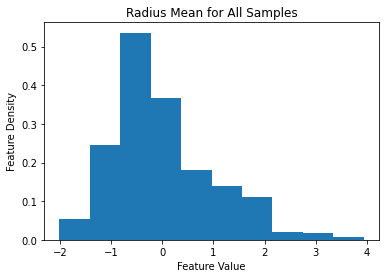

In [36]:
# Create a histogram of a single feature
plt.hist(data_copy['radius_mean'], density=True)

plt.title('Radius Mean for All Samples')
plt.xlabel('Feature Value')
plt.ylabel('Feature Density')

plt.show()

In [37]:
# Separate the data into classes for easier plotting
malignant = data_copy[train_set['diagnosis_label'] == 1]
benign = data_copy[train_set['diagnosis_label'] == 0]

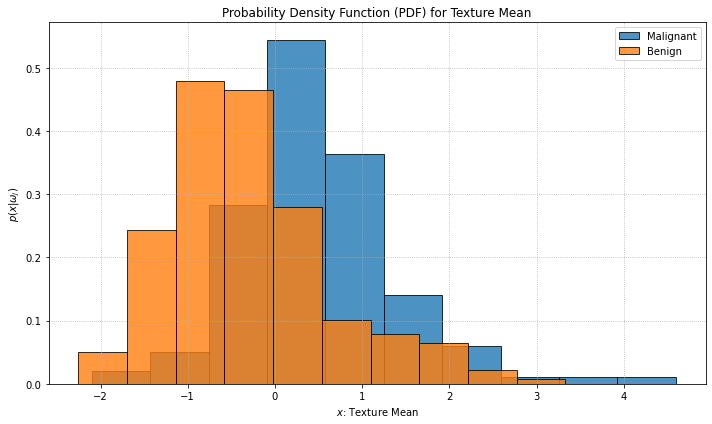

In [63]:
# Create data plots
f, ax = plt.subplots(figsize=(10,6))

x1 = 'texture_mean'
x1_display = x1.replace('_', ' ').title()


# These two lines do the work of plotting a histogram
ax.hist(malignant[x1], density=True, alpha=.8, label="Malignant", bins=10, edgecolor='k')
ax.hist(benign[x1], density=True, alpha=.8, label="Benign", bins=10, edgecolor='k')


#ax.set(xlim=(5,35))

# Annotate Plot
ax.set(xlabel=r'$x$: '+x1_display,
       ylabel=r'$p(x|\omega_{j})$',
       title='Probability Density Function (PDF) for '+x1_display)

ax.legend(frameon=True)
ax.grid(linestyle=':')
plt.tight_layout()

plt.show()

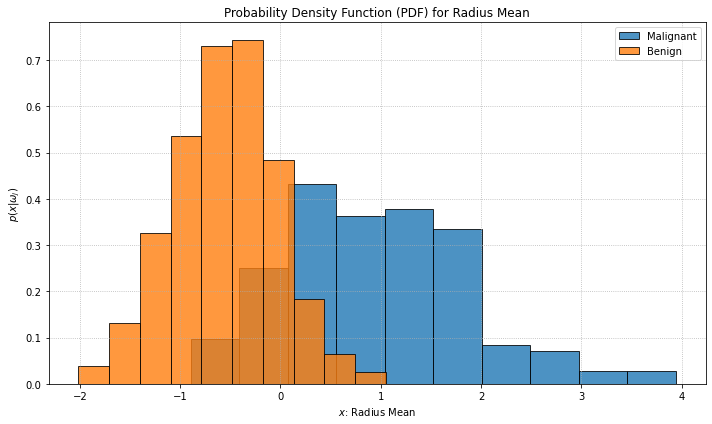

In [64]:
# Create data plots
f, ax = plt.subplots(figsize=(10,6))

x1 = 'radius_mean'
x1_display = x1.replace('_', ' ').title()

ax.hist(malignant[x1], density=True, alpha=.8, label="Malignant", bins=10, edgecolor='k')
ax.hist(benign[x1], density=True, alpha=.8, label="Benign", bins=10, edgecolor='k')

#ax.set(xlim=(5,35))

# Annotate Plot
ax.set(xlabel=r'$x$: '+x1_display,
       ylabel=r'$p(x|\omega_{j})$',
       title='Probability Density Function (PDF) for '+x1_display)

ax.legend(frameon=True)
ax.grid(linestyle=':')
plt.tight_layout()

plt.show()

### Multivariate Data Visualization: Scatter Plots and 2D Histograms

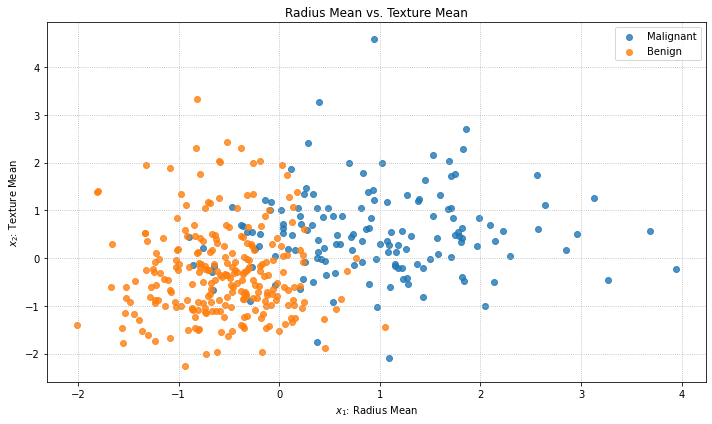

In [40]:
f, ax = plt.subplots(figsize=(10,6))
x1 = 'radius_mean'
x2 = 'texture_mean'

x1_display = x1.replace('_', ' ').title()
x2_display = x2.replace('_', ' ').title()

ax.scatter(malignant[x1], malignant[x2], alpha=.8, label="Malignant")
ax.scatter(benign[x1], benign[x2], alpha=.8, label="Benign")

# Annotate Plot
ax.set(xlabel=r'$x_{1}$: '+x1_display,
       ylabel=r'$x_{2}$: '+x2_display,
       title=x1_display+' vs. '+x2_display)

ax.legend(frameon=True)
ax.grid(linestyle=':')
plt.tight_layout()

plt.show()

### Viewing More than 2 or 3 Variables with Facet Plots

As an example, we can create a scatter matrix (e.g. "facet plot") to display possible correlations between attributes.
This is most helpful for regression targets, when you have a numeric value you want to estimate from the others (we don't have this in the BCA dataset, though).

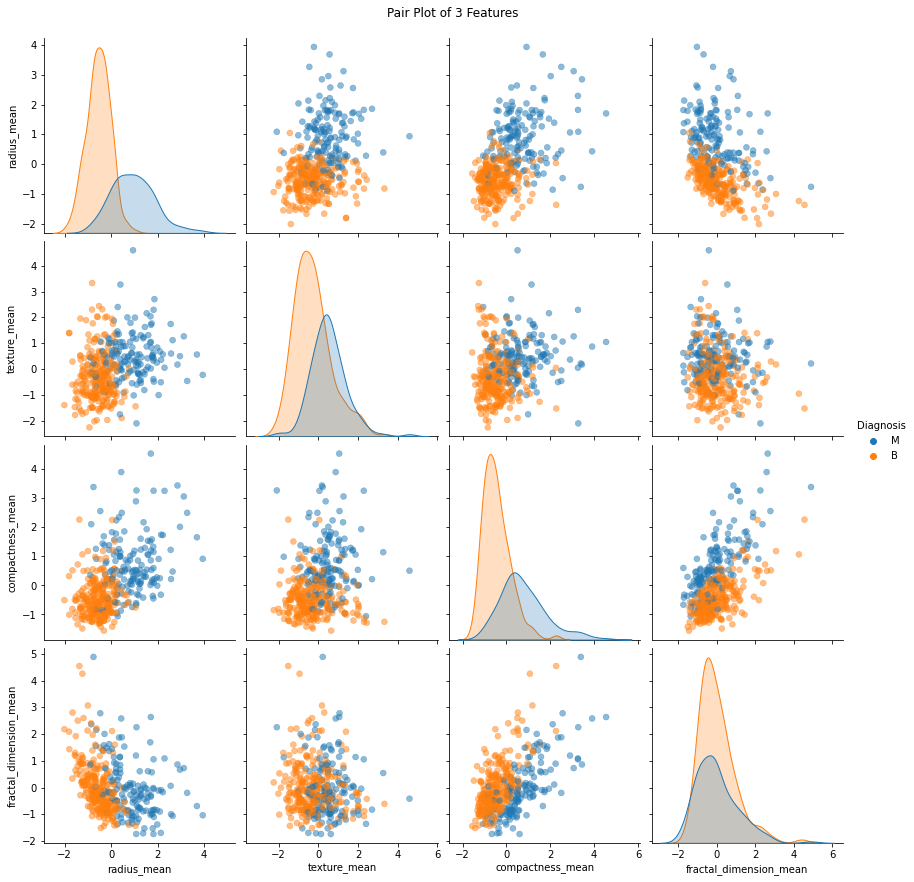

In [41]:
attributes = ["radius_mean", "texture_mean", "compactness_mean", "fractal_dimension_mean"]

# We need to add the "diagnosis" label back in here, so Seaborn can plot it using the `hue` parameter
data_copy_display = data_copy[attributes].copy()
data_copy_display['diagnosis'] = train_set['diagnosis']

g = sns.pairplot(data_copy_display, hue='diagnosis', plot_kws={'alpha': 0.5, 'edgecolor': None}, height=3, aspect=1)

# Alter the plot
g.fig.suptitle('Pair Plot of '+str(len(attributes)-1)+' Features', y=1.02)
g._legend.set_title("Diagnosis")

plt.show()

If we want to zoom in on a particular pair of features that might be informative, we can select them specifically.

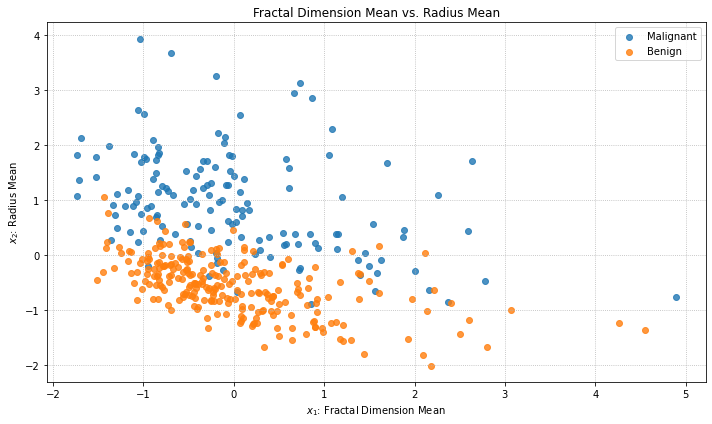

In [42]:
f, ax = plt.subplots(figsize=(10,6))

x1 = 'fractal_dimension_mean'
x2 = 'radius_mean'

x1_display = x1.replace('_', ' ').title()
x2_display = x2.replace('_', ' ').title()

ax.scatter(malignant[x1], malignant[x2], alpha=.8, label="Malignant")
ax.scatter(benign[x1], benign[x2], alpha=.8, label="Benign")

# Annotate Plot
ax.set(xlabel=r'$x_{1}$: '+x1_display,
       ylabel=r'$x_{2}$: '+x2_display,
       title=x1_display+' vs. '+x2_display)

ax.legend(frameon=True)
ax.grid(linestyle=':')
plt.tight_layout()

plt.show()

### Attribute Combinations

We won't do this here, but combining attributes can be done to include additional features you may want to look at. 
If you have a regression target, you can re-calculate your correlation between the target and your new feature to see if the new feature is correlated as well.

# Dimensionality Reduction

These methods will give you a more "all-encompassing" view of your data by providing a low-dimensional embedding or representation of the data in 2 or 3 dimensions.

You can add these methods to the pipeline as well, by the way.

In [43]:
# Dimensionality Reduction Imports
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import MDS
from sklearn.manifold import TSNE

Now create pipelines for different dimensionality reduction targets. 
There may (?) be a way to define multiple alternatives for a given step, but I'm not sure.

Here are some of the different methods you can try:

```
dimred_pipeline = make_pipeline(input_pipeline, PCA(n_components=2))
dimred_pipeline = make_pipeline(input_pipeline, Isomap(n_components=2))
dimred_pipeline = make_pipeline(input_pipeline, LocallyLinearEmbedding(n_components=2))
dimred_pipeline = make_pipeline(input_pipeline, MDS(n_components=2))
dimred_pipeline = make_pipeline(input_pipeline, TSNE(n_components=2))
```

Cut and paste whichever of those you want down below.

In [51]:
input_pipeline = Pipeline([
        ('std_scaler', StandardScaler())
    ])

dimred_pipeline = make_pipeline(input_pipeline, PCA(n_components=2))

In [56]:
# Fit and apply the transform right away
#X_reduced = data_copy.copy()

X_reduced = dimred_pipeline.fit_transform(data_copy)

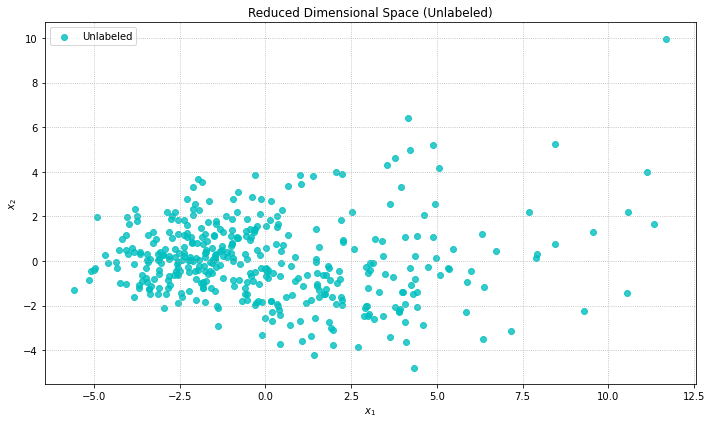

In [57]:
f, ax = plt.subplots(figsize=(10,6))

ax.scatter(X_reduced[:,0], X_reduced[:,1], c='c', alpha=.8, label="Unlabeled")

# Annotate Plot
ax.set(xlabel=r'$x_{1}$',
       ylabel=r'$x_{2}$',
       title=r'Reduced Dimensional Space (Unlabeled)')

ax.legend(frameon=True)
ax.grid(linestyle=':')
plt.tight_layout()

plt.show()

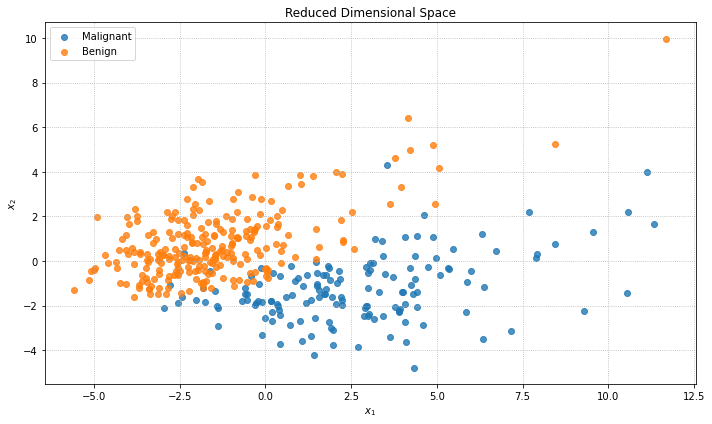

In [58]:
f, ax = plt.subplots(figsize=(10,6))

# Separate the data into classes for easier plotting
malignant = X_reduced[train_set['diagnosis_label'] == 1]
benign = X_reduced[train_set['diagnosis_label'] == 0]

ax.scatter(malignant[:,0], malignant[:,1], alpha=.8, label="Malignant")
ax.scatter(benign[:,0], benign[:,1], alpha=.8, label="Benign")

# Annotate Plot
ax.set(xlabel=r'$x_{1}$',
       ylabel=r'$x_{2}$',
       title=r'Reduced Dimensional Space')

ax.legend(frameon=True)
ax.grid(linestyle=':')
plt.tight_layout()

plt.show()

# Distributions

In this section we create the various distributions that we'll be using to calculate probabilities.

First, select a feature to look at. We'll only look at a single feature in this example.

In [59]:
feat_name = 'texture_mean'

# Create a nice-looking name to use in the plot
feat_display = feat_name.replace('_', ' ').title()

## Create a Density Histogram

Only four lines of code below are used to actually calculate the distribution: `ax.hist(...)` does most of the work, while the `np.append(...)` function is necessary to make the number of counts and bins match up.

Each `ax.hist(...)` line returns the following:

- `counts` is the number of samples in each bin of the histogram.
- `bins` contains the edges of each bin; the first value is the left-hand side of the left-most bin, and the last one is the right-hand side of the right-most bin. 

The rest of the code is justcreating and styling the resulting plot.

In [60]:
malignant = data_copy[train_set['diagnosis_label'] == 1]
benign = data_copy[train_set['diagnosis_label'] == 0]

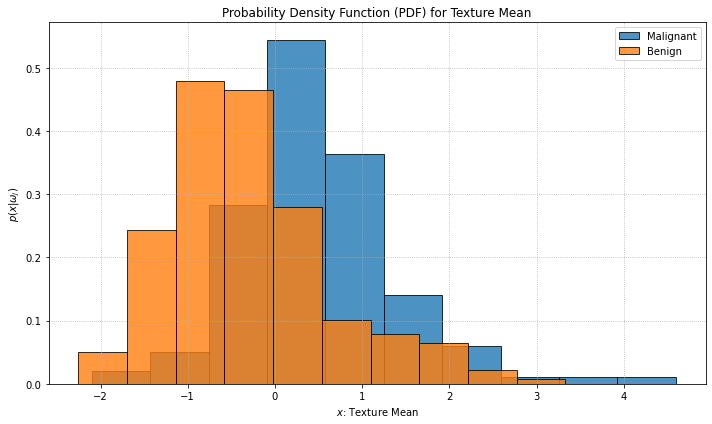

In [61]:
# Create the holder for the plots
f, ax = plt.subplots(figsize=(10,6))

m_counts, m_bins, _ = ax.hist(malignant[feat_name], density=True, alpha=.8, label="Malignant", bins=10, edgecolor='k')
b_counts, b_bins, _ = ax.hist(benign[feat_name], density=True, alpha=.8, label="Benign",  bins=10, edgecolor='k')

# We need to pad counts with a zero because bins is larger by 1
m_counts = np.append(m_counts, [0])
b_counts = np.append(b_counts, [0])

#ax.set(xlim=(5,40))

# Annotate Plot
ax.set(xlabel=r'$x$: '+feat_display,
       ylabel=r'$p(x|\omega_{j})$',
       title='Probability Density Function (PDF) for '+feat_display)

ax.legend(frameon=True)
ax.grid(linestyle=':')
plt.tight_layout()

plt.show()

Note that on the `y`-axis, we are plotting $p(x|\omega_{i})$ rather than the actual number of samples that fall into that bin; this is because we passed `density=True` to the `ax.hist(...)` function.

## Examine Histogram Counts

Let's take a look at what the histogram actually calculates. This is the *percentage* of samples (because we asked for a density) in each class that fall within each bin.

In [65]:
# Examine the outputs
print(f'Number of samples in each bin:')
print(f'\t\tBin\tCount')
print(f'')
for m_count, m_bin in zip(m_counts, m_bins):
    print(f'Malignant\t{m_bin:2.2f}\t{m_count:1.3f}')

print(f'='*29)

print(f'\t\tBin\tCount')
print(f'')
for b_count, b_bin in zip(b_counts, b_bins):
    print(f'Benign\t\t{b_bin:2.2f}\t{b_count:1.3f}')

Number of samples in each bin:
		Bin	Count

Malignant	-2.10	0.020
Malignant	-1.43	0.050
Malignant	-0.76	0.283
Malignant	-0.09	0.545
Malignant	0.58	0.363
Malignant	1.25	0.141
Malignant	1.92	0.061
Malignant	2.59	0.010
Malignant	3.26	0.010
Malignant	3.93	0.010
Malignant	4.60	0.000
		Bin	Count

Benign		-2.25	0.050
Benign		-1.70	0.244
Benign		-1.14	0.480
Benign		-0.58	0.466
Benign		-0.02	0.279
Benign		0.54	0.100
Benign		1.10	0.079
Benign		1.65	0.064
Benign		2.21	0.021
Benign		2.77	0.007
Benign		3.33	0.000


# Calculating Probabilities

## Probability Density Function

Let's try to calcualte $p(x|\omega_{i})$ for both $\omega_{0}$ (Benign) and  $\omega_{1}$ (Malignant) for a *specific* value of $x$.

For example, what if we measure a feature value of 20? What's the probability of observing a 20 from the benign vs. the malignant classes?

In [67]:
m_locs

array([False, False, False, False, False, False, False, False, False,
       False, False])

In [68]:
#feature_value = 20
feature_value = 0.07

# First we find the bin associated with this value
# This will be the first bin that is greater than our target value
m_locs = m_bins > feature_value
m_idx = np.min(np.where(m_locs))

print(f'Feature value {feature_value} appears in the {m_idx}th bin of the Malignant histogram.')

b_locs = b_bins > feature_value
b_idx = np.min(np.where(b_locs))

print(f'Feature value {feature_value} appears in the {b_idx}th bin of the Benign histogram.')

Feature value 0.07 appears in the 4th bin of the Malignant histogram.
Feature value 0.07 appears in the 5th bin of the Benign histogram.


Now, we can just look at the corresponding bin in each histogram and pull the percentage of samples in each class that have that feature value.

In [69]:
p_x_given_m = m_counts[m_idx]
p_x_given_b = b_counts[b_idx]

In [70]:
from IPython.display import Math, HTML
display(HTML("<script src='https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.3/"
               "latest.js?config=default'></script>"))
Math(r'$p(x|\omega_{1}) = '+f'{p_x_given_m:2.3f}'+r'$')

<IPython.core.display.Math object>

In [71]:
from IPython.display import Math, HTML
display(HTML("<script src='https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.3/"
               "latest.js?config=default'></script>"))
Math(r'$p(x|\omega_{2}) = '+f'{p_x_given_b:2.3f}'+r'$')

<IPython.core.display.Math object>

### Refactor to a Function

Let's create a function that will return the histogram counts (density) for any value. 

This is *very common* in programming -- whenever you anticipate you'll have to do something more than once, it's a good idea to write a function to do it for you. It takes more time up front, but saves a ton of time later on.

In [72]:
def p_x_given_omega(bins, counts, value):
    """Given a set of bins and corresponding histogram counts, finds the counts associated with a specific value."""

    assert len(bins) == len(counts), f'Bins has length of {len(bins)}, counts has length of {len(counts)}; these should match.'
    locs = bins > value

    # If none of the locations are larger than the value, then return zero
    if np.any(locs):
        idx = np.min(np.where(locs))
        return counts[idx]
    else:
        return 0

## Prior Probabilities

The prior in this case is "what is the likelihood that we observe a benign or malignant case, regardless of the feature data?"

This is often difficult to calculate. For our case, we'll just set them up as non-informative priors:

$$p(\omega_{0}) = p(\omega_{1}) = 0.5$$

In [73]:
# Prior probabilities
p_m = 0.5
p_b = 1 - p_m

## "Evidence" or "Normalizing Factor"

The *a posteriori* probability must be normalized. To do this, we sum up all the possible ways we could observe a particular feature value:

1. When the class is $\omega_{0}$; or 
2. When the class is $\omega_{1}$

To do this, we first need to set up the x-axis that will be our feature "domain", or the set of values that we want to calculate over. Mathematically this should be $-\infty$ to $+\infty$, but for our case we can just go from the minimum observed feature value to the maximum feature value.

In [74]:
# Set up the bounds of our domain by calculating the min and max feature values
x_min = np.min([malignant[feat_name].min(), benign[feat_name].min()])
x_max = np.max([malignant[feat_name].max(), benign[feat_name].max()])

print(f'Minimum value for {feat_name}: {x_min:2.2f}')
print(f'Maximum value for {feat_name}: {x_max:2.2f}')

Minimum value for texture_mean: -2.25
Maximum value for texture_mean: 4.60


In [75]:
# Now create a vector that goes from min to max, representing different feature values we could measure.
x_domain = np.arange(x_min, x_max, 0.001)

# Our step size is 0.01, which should be good enough for our purposes.
print(f'X domain for {feat_name}:')
print(x_domain)
print('')
print(f'Number of samples in our x axis: {len(x_domain)}')

X domain for texture_mean:
[-2.25346708 -2.25246708 -2.25146708 ...  4.59353292  4.59453292
  4.59553292]

Number of samples in our x axis: 6850


Now for each of these $x$ values, calculate our denominator value:

$$ \sum_{i=0}^{c} P(x|\omega_{i})P(\omega_{i}) $$

In [76]:
denominator = []
for x in x_domain:
    denominator.append(p_x_given_omega(m_bins, m_counts, x)*p_m + p_x_given_omega(b_bins, b_counts, x)*p_b)

## *A Posteriori* Probability of Observing $\omega_{i}$

Finally we can calculate $P(\omega_{i} | x)$ for each value of $x$ in our domain.

In [77]:
p_m_given_x = []
p_b_given_x = []
for i,x in enumerate(x_domain):
    p_m_given_x.append( (p_x_given_omega(m_bins, m_counts, x) * p_m) / denominator[i] )
    p_b_given_x.append( (p_x_given_omega(b_bins, b_counts, x) * p_b) / denominator[i] )

/tmp/ipykernel_110276/1911939653.py:4: RuntimeWarning: invalid value encountered in double_scalars
  p_m_given_x.append( (p_x_given_omega(m_bins, m_counts, x) * p_m) / denominator[i] )
/tmp/ipykernel_110276/1911939653.py:5: RuntimeWarning: invalid value encountered in double_scalars
  p_b_given_x.append( (p_x_given_omega(b_bins, b_counts, x) * p_b) / denominator[i] )


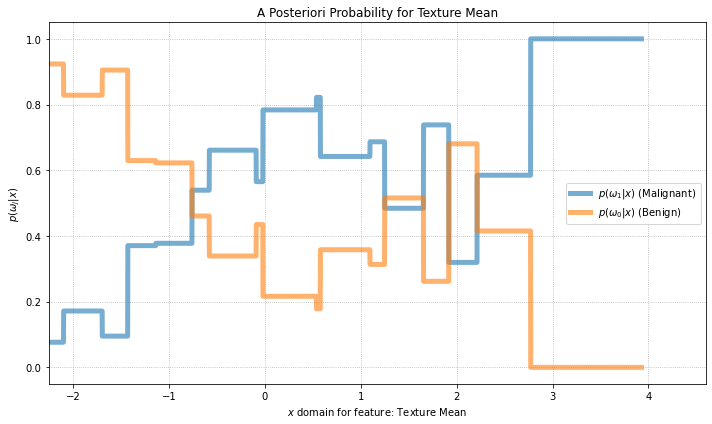

In [78]:
# Create the holder for the plots
f, ax = plt.subplots(figsize=(10,6))


ax.plot(x_domain, p_m_given_x, alpha=0.6, linewidth=5, label=r'$p(\omega_{1} | x)$ (Malignant)')
ax.plot(x_domain, p_b_given_x, alpha=0.6, linewidth=5, label=r'$p(\omega_{0} | x)$ (Benign)')

#ax.set(xlim=(5,40))
ax.set(xlim=(x_domain.min(), x_domain.max()))

# Annotate Plot
ax.set(xlabel=r'$x$ domain for feature: '+feat_display,
       ylabel=r'$p(\omega_{j} | x)$',
       title='A Posteriori Probability for '+feat_display)

ax.legend(frameon=True)
ax.grid(linestyle=':')
plt.tight_layout()

plt.show()

Note that this output is very "blocky" -- that's because for all of the samples within a bin, we have the same output value.

What were to happen if we use a **parametric** probability density function?

# The Cheaty Way

Of course, you could just... cheat.

In [79]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(np.array(training_values[feat_name]).reshape(-1, 1), training_labels).predict_proba(x_domain.reshape(-1, 1))

/home/scottdoy/miniconda3/envs/occ/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [80]:
y_pred

array([[0.95824579, 0.04175421],
       [0.95819377, 0.04180623],
       [0.95814169, 0.04185831],
       ...,
       [0.08637316, 0.91362684],
       [0.08634912, 0.91365088],
       [0.08632509, 0.91367491]])

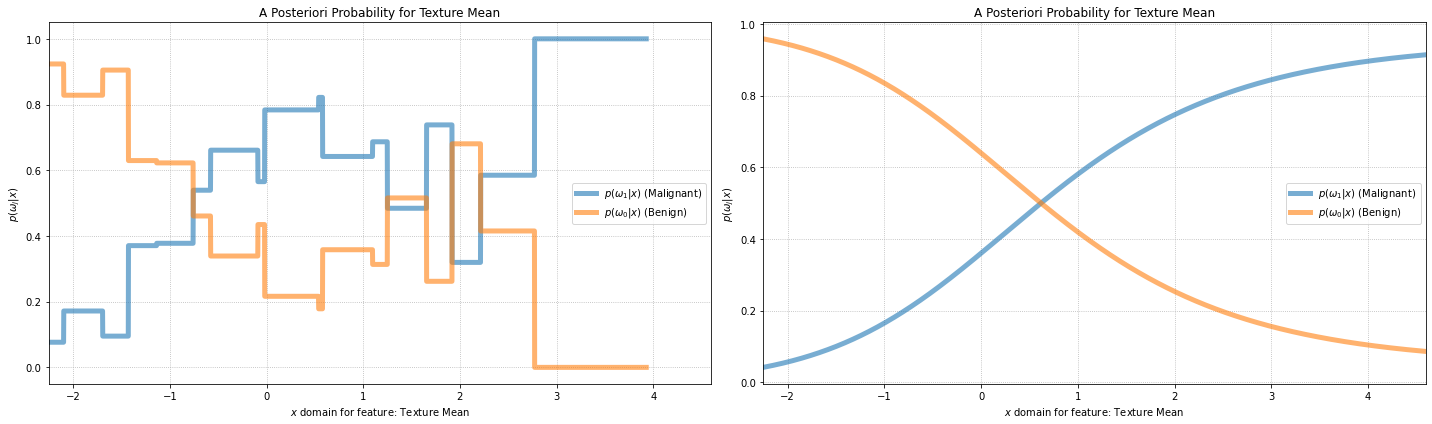

In [83]:
# Create the holder for the plots
f, axes = plt.subplots(1,2,figsize=(20,6))

axes[0].plot(x_domain, p_m_given_x, alpha=0.6, linewidth=5, label=r'$p(\omega_{1} | x)$ (Malignant)')
axes[0].plot(x_domain, p_b_given_x, alpha=0.6, linewidth=5, label=r'$p(\omega_{0} | x)$ (Benign)')

axes[1].plot(x_domain, y_pred[:,1], alpha=0.6, linewidth=5, label=r'$p(\omega_{1} | x)$ (Malignant)')
axes[1].plot(x_domain, y_pred[:,0], alpha=0.6, linewidth=5, label=r'$p(\omega_{0} | x)$ (Benign)')


for ax in axes:
    ax.set(xlim=(x_min,x_max))
    
    # Annotate Plot
    ax.set(xlabel=r'$x$ domain for feature: '+feat_display,
           ylabel=r'$p(\omega_{j} | x)$',
           title='A Posteriori Probability for '+feat_display)
    
    ax.legend(frameon=True)
    ax.grid(linestyle=':')
    plt.tight_layout()
    
plt.show()

What are the similarities between these curves? What are the differences?